In [1]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

consumer_key = "pR3paOrOlGs9W5qeniQ0frfus"
consumer_secret = "zVUlGNfjJOxnxQ6lwc129HFI7U7iAbmKJ3tTY0AE87tKYUxDD3"
access_token = "921378509058199553-kYMhWKB2vfDAyJQKyAm8qREIboRECHk"
access_token_secret = "yzSKI6mingSQzcc8WV4YIQBelFCJIup00g1axL0xWHe9v"

def cria_arquivo():
    arquivo = open('data/twitter_data.json', 'w')
    arquivo.close()

def escreve_no_arquivo( data):
    arquivo = open('twitter_data.json', 'r') # Abra o arquivo (leitura)
    conteudo = arquivo.readlines()
    conteudo.append(data)   # insira seu conteúdo

    arquivo = open('twitter_data.json', 'w') # Abre novamente o arquivo (escrita)
    arquivo.writelines(conteudo)    # escreva o conteúdo criado anteriormente nele.

    arquivo.close()

    
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        escreve_no_arquivo( data)
        return True

    def on_error(self, status):
        print (status)



if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    cria_arquivo()
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['jogos', 'games', 'entreterimento', 'jogo', 'game'])

ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt



tweets_data_path = 'C:/Users/JuniorF/Python_Jupyter/twitter_data.json'

tweets_data = []
t = ""
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
jsonData = json.dumps(tweets_data)


In [6]:
tweets = pd.DataFrame()


In [7]:
import re
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))


In [16]:
def word_in_text(word, text):
    word = word.lower()
    texto = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['jogos'] = tweets['text'].apply(lambda tweet: word_in_text('jogos', tweet))
tweets['games'] = tweets['text'].apply(lambda tweet: word_in_text('games', tweet))
tweets['entreterimento'] = tweets['text'].apply(lambda tweet: word_in_text('entreterimento', tweet))
tweets['jogo'] = tweets['text'].apply(lambda tweet: word_in_text('game', tweet))
tweets['game'] = tweets['text'].apply(lambda tweet: word_in_text('jogo', tweet))

print (tweets.head)

<bound method NDFrame.head of                                                 text lang country  jogos  \
0  RT @johnbond1313: @bobounds y’all are missing ...   en    None  False   
1  RT @cathalyse: it’s all fun &amp; games until ...   en    None  False   
2  RT @MarkAshford_: Pro player - More young play...   en    None  False   
3  RT @TSupdated: Baby, let the games begin. \n#R...   en    None  False   
4  #ad Nintendo Game Boy Advance SP Pearl Blue Ha...   en    None  False   
5  Toca Boca Pet Doctor - Take Care Of Animals - ...   en    None  False   
6  RT @WBuzzer: Microsoft to Begin Xbox One Backw...   en    None  False   

   games  entreterimento  
0   True           False  
1   True           False  
2   True           False  
3   True           False  
4   True           False  
5  False           False  
6  False           False  >


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [32]:
cv = CountVectorizer(vocabulary=['games', 'jogos', 'entreterimento', 'game', 'jogo'])
count_matrix = cv.fit_transform(tweets.text)
print(cv.get_feature_names())

['games', 'jogos', 'entreterimento']


In [68]:
word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count[:50]



,word,count
0,games,7
1,jogos,0
2,entreterimento,0


In [65]:
print (d)
l=d['count'][0]
print (l)


   index            word  count
0      0           games      7
1      1           jogos      0
2      2  entreterimento      0
7


In [55]:
prg_langs = ['jogos', 'entreterimento', 'games', 'game','jogo']
tweets_by_prg_lang = [d['count'][0], d['count'][1], d['count'][2] , d['count'][3], d['count'][4] ]



In [56]:
 x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

<Container object of 3 artists>

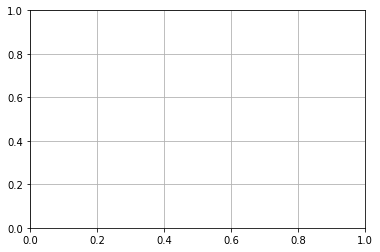

In [72]:
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show()